# 4.2 百家姓统计研究

这是浙江教育出版社高中信息技术教材必修1《数据与计算》4.2的数据分析实践。

活动描述：通过统计某地的姓名数据，分析当地姓氏的构成情况。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import codecs

#显示中文字体处理需要
#plt.rcParams["font.family"] = 'Arial Unicode MS' # mac
plt.rcParams['font.sans-serif'] = ['SimHei'] #windows、vvboard

# 定义复姓 list
fx=['欧阳','太史','端木','上官','司马','东方','独孤','南宫','万俟','闻人','夏侯','诸葛','尉迟','公羊',
'赫连','澹台','皇甫','宗政','濮阳','公冶','太叔','申屠','公孙','慕容','仲孙','钟离','长孙','宇文',
'司徒','鲜于','司空','闾丘','子车','亓官','司寇','巫马','公西','颛孙','壤驷','公良','漆雕','乐正',
'宰父','谷梁','拓跋','夹谷','轩辕','令狐','段干','百里','呼延','东郭','南门','羊舌','微生','公户',
'公玉','公仪','梁丘','公仲','公上','公门','公山','公坚','左丘','公伯','西门','公祖','第五','公乘'
]

## 1.读取数据

In [2]:
# 读文件，names_s.csv是小文件，names.csv是原文件
file=codecs.open('names_s.csv','r','utf-8')

## 2.处理数据

In [3]:
xing=[]
j=0
for i in file:
    #复姓处理
    if i[0:2] in fx:
        xing.append(i[0:2])
    else:
        xing.append(i[0:1])
    j=j+1
data={'xing':xing,'renshu':0}
df=pd.DataFrame(data)

看一下整理好的数据。

In [4]:
df

,xing,renshu
0,x,0
1,龙,0
2,龚,0
3,齐,0
4,车,0
...,...,...
65530,赵,0
65531,龙,0
65532,程,0
65533,贲,0


In [4]:
#按照xing的数量统计
s= df.groupby('xing').count()
s

,renshu
xing,
x,1
喻,196
国,212
堪,1
堵,42
...,...
黄,19199
黎,2513
齐,3413


In [5]:
# sort 排序   结果
s=s.sort_values('renshu',ascending=False)
s

,renshu
xing,
黄,19199
赵,6053
龚,3722
樊,3447
齐,3413
...,...
闻人,1
殳,1
罗,1


通过count()返回的是Pnadsd的Series类型数据。`Series` 是带索引的一维数组，可存储整数、浮点数、字符串、**Python** 对象等类型的数据。`Series` 包含一个数组的数据（values）和一个与数据关联的索引（index）。用index和values两个属性可以获取。

In [38]:
s.index[0:20]

Index(['黄', '赵', '龚', '樊', '齐', '龙', '黎', '辛', '章', '管', '程', '贾', '车', '童',
       '米', '贺', '路', '边', '连', '段'],
      dtype='object', name='xing')

In [39]:
s.values[0:20]

array([[19199],
       [ 6053],
       [ 3722],
       [ 3447],
       [ 3413],
       [ 2687],
       [ 2513],
       [ 1711],
       [ 1639],
       [ 1600],
       [ 1513],
       [ 1480],
       [ 1446],
       [ 1066],
       [  846],
       [  835],
       [  782],
       [  755],
       [  714],
       [  673]])

## 3.绘图

对Series类型画图，直接调用。

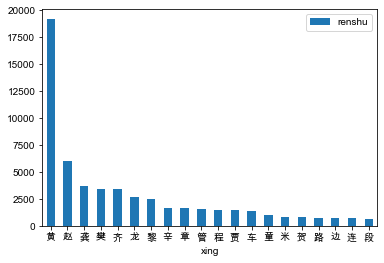

In [46]:
#前20绘图
s[0:20].plot(kind='bar',rot=0)
#显示图形
plt.show()

硬生生使用最传统的方式来画一个图，index可以直接转为list，但是values要一个一个取出来转。

In [29]:
x=list(s.index[0:10])
x

['黄', '赵', '龚', '樊', '齐', '龙', '黎', '辛', '章', '管']

In [30]:
y=[]
for i in s.values[0:10].tolist():
    y.append(i[0])
y

[19199, 6053, 3722, 3447, 3413, 2687, 2513, 1711, 1639, 1600]

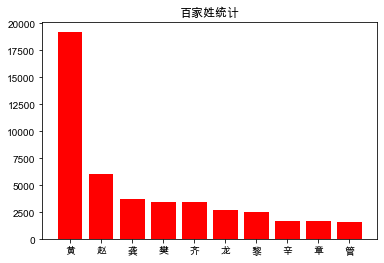

In [31]:
fig = plt.figure()
plt.title('百家姓统计')
plt.bar(x,y,color='r', linewidth=3)
plt.show()